In [1]:
import matplotlib.pyplot as plt
from  matplotlib.ticker import IndexLocator, NullFormatter
%matplotlib inline
import numpy as np
import seaborn as sns
from matplotlib import animation, rcParams
rcParams.update({'figure.autolayout': True})

/Library/Python/2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def rule_index(left, mid, right):    
    return int(str(left) + str(mid) + str(right),2)

In [3]:
def next_generation(rule, current_gen):
    
    next_gen = np.zeros(len(current_gen))
    ruleset = format(rule,'08b')
    
    for i in range(len(current_gen)-1):
        left = current_gen[i-1]
        mid = current_gen[i]
        right = current_gen[i+1]
        
        next_gen[i] = ruleset[::-1][rule_index(int(left), int(mid), int(right))]
    
    return next_gen

In [4]:
def make_ca(rule, init, niter):

    temp_gen = init
    current_generation = np.zeros(len(init)*niter).reshape(niter,len(init))
    current_generation[0] = init
    for i in range(1,niter):
        current_generation[i] = next_generation(rule, temp_gen)
        temp_gen = current_generation[i]
    
    return current_generation

In [5]:
def plot_grid(rule, grid, ax=None):
    if ax is None:
        ax = plt.subplot(111)
    with sns.axes_style("white"):
        ax.grid(True, which='major', color='grey', linewidth=0.5)
        ax.imshow(grid, interpolation='none', cmap='Greys', aspect=1, alpha=0.8)
        ax.xaxis.set_major_locator(IndexLocator(1, 0))
        ax.yaxis.set_major_locator(IndexLocator(1, 0))
        ax.xaxis.set_major_formatter( NullFormatter() )
        ax.yaxis.set_major_formatter( NullFormatter() )

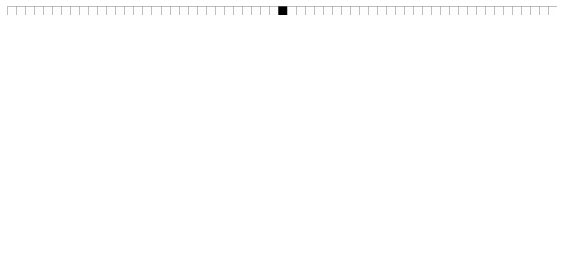

In [17]:
niter = 30
width = niter*2+1
init = np.zeros(width, 'int')
init[width//2] = 1

def animate(x):
    rule = 214
    grid = make_ca(rule, init, x)
    plot_grid(rule, grid)
    
fig = plt.figure()
anim = animation.FuncAnimation(fig, animate, frames=range(1,niter), interval=1, blit=False)
anim.save('rule214.gif', writer='imagemagick', fps=5)
plt.show()